# HSE 2019 ML (bachelors 3rd course)
## Homework #1
### Student: Igor Tukh

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from collections import defaultdict
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATASETS_DIR = 'datasets'
DATASETS = ['cancer.csv', 'spam.csv', 'blobs.csv']

In [12]:
def load_csv_dataset(dataset_path, label_name='label'):
    if label_name is not None:
        dataset = pd.read_csv(dataset_path)
        data_columns = np.array([name for name in dataset.columns if name != label_name])
        return dataset[label_name], dataset[data_columns]

#### 1) (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.


In [41]:
def get_k_nearest_indexes(from_point, to_points, k):
    dist_square = lambda x: np.sum((from_point - x) ** 2)
    dists = np.array([dist_square(point) for point in to_points])
    return dists.argsort()[:k]

In [45]:
def kNN(point, points, points_labels, k, nearest_neighbors=None):
    affinities = defaultdict(lambda:0)
    nearest_neighbors = get_k_nearest_indexes(point, points, k) if nearest_neighbors is None else nearest_neighbors[:k]
    for neighbor_ind in nearest_neighbors:
        affinities[points_labels[neighbor_ind]] += 1
    result_label = None
    max_label_value = 0
    for label, value in affinities.items():
        if max_label_value < value:
            result_label = label
            max_label_value = value
    return result_label 

In [61]:
def get_LOO(dataset_path, max_k, scale=False):
    labels, data = load_csv_dataset(dataset_path)
    if scale:
        index = data.index
        columns = data.columns
        scaler = MinMaxScaler()
        data = pd.DataFrame(data = scaler.fit_transform(data), index=index, columns=columns)
    LOO = defaultdict(lambda:0)
    dataset_len = labels.shape[0]
    for ind in tqdm(range(dataset_len)):
        points_labels = pd.concat([labels[:ind], labels[ind+1:]]).to_numpy()
        points = pd.concat([data[:ind], data[ind+1:]]).to_numpy()
        point = data.iloc[ind].to_numpy()
        label = labels.iloc[ind]
        nearest_neighbors = get_k_nearest_indexes(point, points, max_k)
        for k in reversed(range(1, max_k + 1)):
            kNN_label = kNN(point, points, points_labels, k, nearest_neighbors)
            if kNN_label != label:
                LOO[k] += 1
    for k in range(1, max_k + 1):
        LOO[k] = 1.0 * LOO[k] / dataset_len
        print('dataset {}: k = {}, LOO = {}'.format(dataset_path, k, 1.0 * LOO[k]))
    return LOO

In [63]:
results = []

In [64]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10)))


dataset datasets/cancer.csv: k = 1, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 2, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 3, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 4, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 5, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 6, LOO = 0.070298769771529
dataset datasets/cancer.csv: k = 7, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 8, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 9, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 10, LOO = 0.06854130052724078



dataset datasets/spam.csv: k = 1, LOO = 0.16931101934362094
dataset datasets/spam.csv: k = 2, LOO = 0.16931101934362094
dataset datasets/spam.csv: k = 3, LOO = 0.18561182351662683
dataset datasets/spam.csv: k = 4, LOO = 0.17344055640078243
dataset datasets/spam.csv: k = 5, LOO = 0.1858291675722669
dataset datasets/spam.csv: k = 6, LOO = 0.1767007172353836
dataset datasets/spam.csv: k = 7, LOO = 0.1958269941317105
dataset datasets/spam.csv: k = 8, LOO = 0.18235166268202566
dataset datasets/spam.csv: k = 9, LOO = 0.20256465985655292
dataset datasets/spam.csv: k = 10, LOO = 0.18713323190610737


#### 2) (2 points) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

The task statementd doesn't say that we have to implement MinMaxScaler, so I'll use one from `sklearn`

In [65]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10, scale=True)))


dataset datasets/cancer.csv: k = 1, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 2, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 3, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 4, LOO = 0.028119507908611598
dataset datasets/cancer.csv: k = 5, LOO = 0.033391915641476276
dataset datasets/cancer.csv: k = 6, LOO = 0.03163444639718805
dataset datasets/cancer.csv: k = 7, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 8, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 9, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 10, LOO = 0.026362038664323375


/Users/itukh/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



dataset datasets/spam.csv: k = 1, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 2, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 3, LOO = 0.09476200825907412
dataset datasets/spam.csv: k = 4, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 5, LOO = 0.09519669637035427
dataset datasets/spam.csv: k = 6, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 7, LOO = 0.09932623342751576
dataset datasets/spam.csv: k = 8, LOO = 0.09063247120191263
dataset datasets/spam.csv: k = 9, LOO = 0.1019343620951967
dataset datasets/spam.csv: k = 10, LOO = 0.0969354488154749


And finally, let's see plots

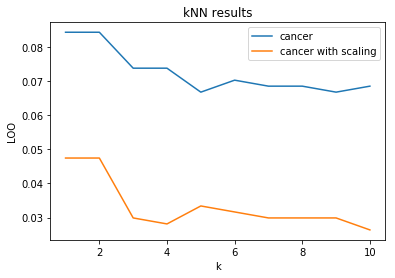

In [68]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[0][1][k] for k in ks], label = 'cancer')
plt.plot(ks, [results[2][1][k] for k in ks], label = 'cancer with scaling')
plt.legend()
plt.show()

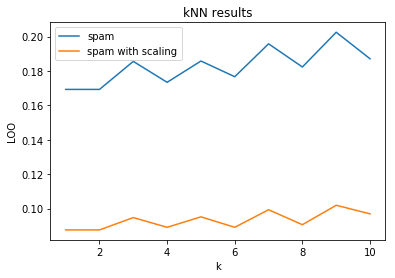

In [69]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[1][1][k] for k in ks], label = 'spam')
plt.plot(ks, [results[3][1][k] for k in ks], label = 'spam with scaling')
plt.legend()
plt.show()

#### 3) (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.